#  Machine Learning Model to Predict whether the Breast Tumor Diagnosis is Malignant or Benign

In this project we shall train a Machine Learning Model which will be able to identify whether a breast tumor diagnosed is malignant or benign.



Since we are trying to identify if the tumor is malignant or benign , this is a **Binary Classification** Problem

# Introduction

### What is Breast Tumor

A tumor is a mass of abnormal tissues in the body.A tumor that develops in the breast is called **Breast Cancer**.Breast cancer is one of the most common cancers among women. It’s most likely to affect women over the age of 50.

**Benign Tumors** do not invade other cells or spread aggressively.While they may be painful , they are relatively harmless compared to cancerous tumors

**Malignant Tumors** are cancerous and invade other cells.They invade and damage surrounding cells.It can also travel to other parts of the body and form new tumors

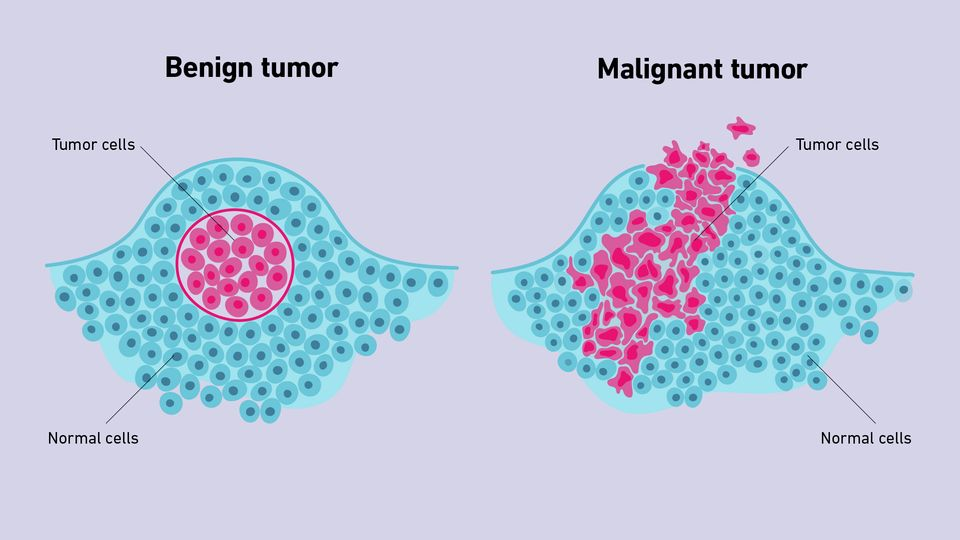


Detection of the tumor is usually done using medical practices such as ultrasound,biopsy etc.In this project we shall train a machine learning model which will be able to classify the type of the breast tumor


# Workflow

### We shall follow the given procedure to build our model

1.Exploratory Data Ananlysis(EDA)<br>
2.Preprocessing the data<br>
3.Model Training<br>
4.Model Fine-Tuning<br>
5.Model Evaluation<br>




# Exploratory Data Analysis(EDA)

The dataset we are about to use is the Wisconsin Breast Cancer Dataset(Original) from the UCI Machine Learning Repository

In [58]:
#Importing required tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

In [3]:
#Importing our Dataset
df=pd.read_csv('Breast_Cancer_Project.csv')

In [4]:
#Viewing our Dataset
df.head(10)

,ID,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,SE_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitosis,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
5,1017122,8,10,10,8,7,10,9,7,1,1
6,1018099,1,1,1,1,2,10,3,1,1,0
7,1018561,2,1,2,1,2,1,3,1,1,0
8,1033078,2,1,1,1,2,1,1,1,5,0
9,1033078,4,2,1,1,2,1,2,1,1,0



### Attribute Information

1. Sample code number:            id number
2. Clump Thickness:               1 - 10
3. Uniformity of Cell Size:       1 - 10
4. Uniformity of Cell Shape:      1 - 10
5. Marginal Adhesion:             1 - 10
6. Single Epithelial Cell Size:   1 - 10
7. Bare Nuclei:                   1 - 10
8. Bland Chromatin:               1 - 10
9. Normal Nucleoli:               1 - 10
10. Mitoses:                       1 - 10
11. Class:                        (0 for benign, 1 for malignant)

In [5]:
#Viewing no.of rows and colums
df.shape

(699, 11)

In [6]:
#Viewing no.of Malignant and Benign cases
df['Class'].value_counts()

0    458
1    241
Name: Class, dtype: int64

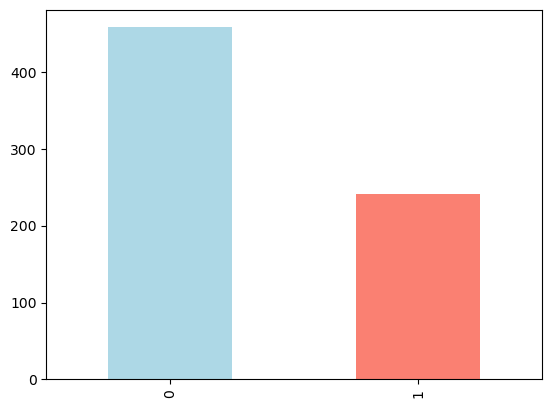

In [7]:
#Plotting a bar graph
df['Class'].value_counts().plot(kind='bar',color=['lightblue','salmon']);

In [8]:
#Viewing information about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 699 non-null    int64 
 1   Clump_Thickness    699 non-null    int64 
 2   Cell_Size          699 non-null    int64 
 3   Cell_Shape         699 non-null    int64 
 4   Marginal_Adhesion  699 non-null    int64 
 5   SE_Cell_Size       699 non-null    int64 
 6   Bare_Nuclei        699 non-null    object
 7   Bland_Chromatin    699 non-null    int64 
 8   Normal_Nucleoli    699 non-null    int64 
 9   Mitosis            699 non-null    int64 
 10  Class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 65.5+ KB


In [9]:
#Viewing mathematical parameters of each column
df.describe()

,ID,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,SE_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitosis,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,0.344778
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.475636
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000




# Data Preprocessing

We shall check if our dataset contains any string or null objects

In [10]:
#Checking for null objects
df.isnull().values.sum()

0

Since we do not have any missing data , we shall check if any of our columns are of string datatype

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 699 non-null    int64 
 1   Clump_Thickness    699 non-null    int64 
 2   Cell_Size          699 non-null    int64 
 3   Cell_Shape         699 non-null    int64 
 4   Marginal_Adhesion  699 non-null    int64 
 5   SE_Cell_Size       699 non-null    int64 
 6   Bare_Nuclei        699 non-null    object
 7   Bland_Chromatin    699 non-null    int64 
 8   Normal_Nucleoli    699 non-null    int64 
 9   Mitosis            699 non-null    int64 
 10  Class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 65.5+ KB


As we can seee, the column titled **Bare_Nuclei** is of string datatype.We must convert it to numerical datatype as our machine learning model cannot work with string values

In [12]:
df['Bare_Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [13]:
# The character '?' is used to denote a missing value.We should convert this column to integer values
filt=(df['Bare_Nuclei']=='?')
# Filling -1 to cells containing '?'
df.loc[filt,'Bare_Nuclei']=-1
# We shall also add a seperate column to show if the 'Bare_Nuclei' attribute was missing in the original dataset
df['BN_Missing']=filt

In [14]:
df['BN_Missing'].value_counts()

False    683
True      16
Name: BN_Missing, dtype: int64

In [15]:
#Converting object column to integer column
df['Bare_Nuclei']=df['Bare_Nuclei'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 698
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 699 non-null    int64
 1   Clump_Thickness    699 non-null    int64
 2   Cell_Size          699 non-null    int64
 3   Cell_Shape         699 non-null    int64
 4   Marginal_Adhesion  699 non-null    int64
 5   SE_Cell_Size       699 non-null    int64
 6   Bare_Nuclei        699 non-null    int32
 7   Bland_Chromatin    699 non-null    int64
 8   Normal_Nucleoli    699 non-null    int64
 9   Mitosis            699 non-null    int64
 10  Class              699 non-null    int64
 11  BN_Missing         699 non-null    bool 
dtypes: bool(1), int32(1), int64(10)
memory usage: 63.5 KB


Since our dataset doesnt have any string or missing values, we can start modelling


# Modelling

In this section we shall fit our data into multiple models and choose the one with best performance as our baseline model

In [17]:
#Splitting Target variable from independent variables
X=df.drop('Class',axis=1)
y=df['Class'].values

In [18]:
#Independent features
X

,ID,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,SE_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitosis,BN_Missing
0,1000025,5,1,1,1,2,1,3,1,1,False
1,1002945,5,4,4,5,7,10,3,2,1,False
2,1015425,3,1,1,1,2,2,3,1,1,False
3,1016277,6,8,8,1,3,4,3,7,1,False
4,1017023,4,1,1,3,2,1,3,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,False
695,841769,2,1,1,1,2,1,1,1,1,False
696,888820,5,10,10,3,7,3,8,10,2,False
697,897471,4,8,6,4,3,4,10,6,1,False


In [19]:
#Target variable array
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

### Training and Test Split
We shall now split our data into training and test sets

In [20]:
np.random.seed(1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [21]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((559, 11), (140, 11), (559,), (140,))

### Choosing the Model

In [22]:
#Putting our models in a dictionary

models={ "KNN" : KNeighborsClassifier(),
         "Logistic Regression" : LogisticRegression(),
         "Random Forest" : RandomForestClassifier(),
         "Naive Bayes" : GaussianNB(),
         "Support Vector" : svm.SVC()
        }

In [23]:
#Function to fit and score model

def fit_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(1)
    scores={}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        scores[name]=model.score(X_test,y_test)
    return scores
        

In [24]:
model_scores=fit_score(models,X_train,X_test,y_train,y_test)

In [25]:
model_scores

{'KNN': 0.5714285714285714,
 'Logistic Regression': 0.6571428571428571,
 'Random Forest': 0.9785714285714285,
 'Naive Bayes': 0.9,
 'Support Vector': 0.6571428571428571}

 Since Random Forest Classifier has the highest accuracy from the above models we shall choose it as our base model

In [26]:
#Choosing RandomForestClassifier as our base model
rf=RandomForestClassifier()


# Hyperparameter Tuning


In this section we shall try to improve the performance of our model by adjusting its hyperparameters

In [27]:
#Getting the parameters of our model
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Tuning ny Hand

We shall try tuning the no.of estimators using a simple loop to check if the model performs better on our test set

In [28]:
est=range(10,201,10)

#Creating dictionaries to store train and test scores for each estimators

train_scores = {}

test_scores = {}



# Loop through different estimators values
for i in est:
    rf.set_params(n_estimators = i) # set neighbors value
    
    # Fit the algorithm
    rf.fit(X_train, y_train)
    
    # Update the training scores
    train_scores[i]=rf.score(X_train, y_train)
    
    # Update the test scores
    test_scores[i]=rf.score(X_test, y_test)

In [29]:
train_scores

{10: 0.998211091234347,
 20: 1.0,
 30: 1.0,
 40: 1.0,
 50: 1.0,
 60: 1.0,
 70: 1.0,
 80: 0.998211091234347,
 90: 1.0,
 100: 1.0,
 110: 1.0,
 120: 1.0,
 130: 1.0,
 140: 1.0,
 150: 1.0,
 160: 1.0,
 170: 1.0,
 180: 1.0,
 190: 1.0,
 200: 1.0}

In [30]:
test_scores

{10: 0.9571428571428572,
 20: 0.9785714285714285,
 30: 0.9714285714285714,
 40: 0.9714285714285714,
 50: 0.9714285714285714,
 60: 0.9785714285714285,
 70: 0.9714285714285714,
 80: 0.9785714285714285,
 90: 0.9785714285714285,
 100: 0.9785714285714285,
 110: 0.9714285714285714,
 120: 0.9714285714285714,
 130: 0.9785714285714285,
 140: 0.9785714285714285,
 150: 0.9785714285714285,
 160: 0.9785714285714285,
 170: 0.9785714285714285,
 180: 0.9785714285714285,
 190: 0.9785714285714285,
 200: 0.9785714285714285}

Maximum score on the test data: 97.86%


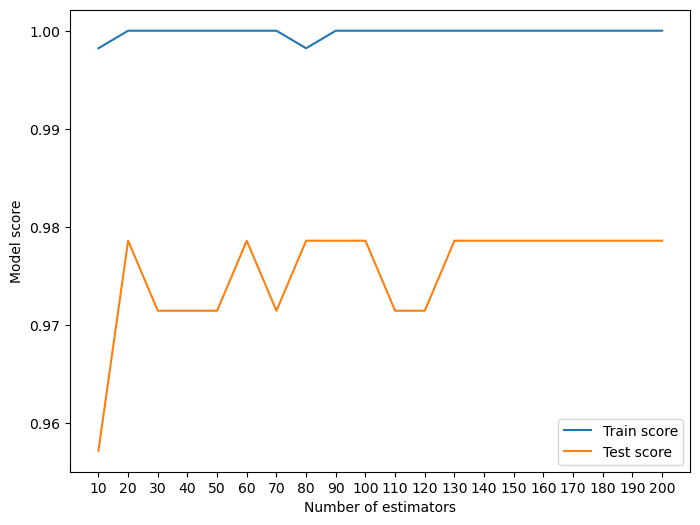

In [31]:
#Plotting grapf to visualise the scors

plt.figure(figsize=(8,6))
plt.plot(est, train_scores.values(), label="Train score")
plt.plot(est, test_scores.values(), label="Test score")
plt.xticks(np.arange(10, 201, 10))
plt.xlabel("Number of estimators")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum score on the test data: {max(test_scores.values())*100:.2f}%")

As we observe , our model performs extremely well on training data but is unable to replicate the samr performance on our test data.This is called **Overfitting**

Tuning by hand , we observe there isnt much change in the models performance.So we shall try hyperparameter tuning using another method.


### Using RandomizedSearchCV

In [32]:
# We shall create a grid with different parameters to use in RandomizedSearchCV

params={ 'n_estimators':np.arange(10,1000,50),
         'max_depth': [None,3,5,10],
         'min_samples_split':np.arange(2,20,2),
         'min_samples_leaf':np.arange(1,20,2)}

np.random.seed(1)

#Setting up random hyperparameter search with 5 fold cros validation

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=params,
                         cv=5,
                         n_iter=20,
                         verbose=True)

rs_rf.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [33]:
rs_rf.best_params_

{'n_estimators': 110,
 'min_samples_split': 10,
 'min_samples_leaf': 13,
 'max_depth': 3}

In [34]:
rs_rf.score(X_test,y_test)

0.9785714285714285

This is the best performance determined using RandomisedSearchCV.Even though it is not much different from our base model we shall use the new parameters for our evaluation



# Evaluation

In this section we shall evaluate our model using different metrics


### Accuracy

In [41]:
# Accuracy is simply the score gib=ven by the model
rs_rf.score(X_test,y_test)

0.9785714285714285

### ROC and AUC Score

The Receiver Operating Characteristics Curve is a plot of true positive rate against false posititve rate at various thresholds.

In [38]:
y_pred=rs_rf.predict(X_test)

In [39]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [40]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

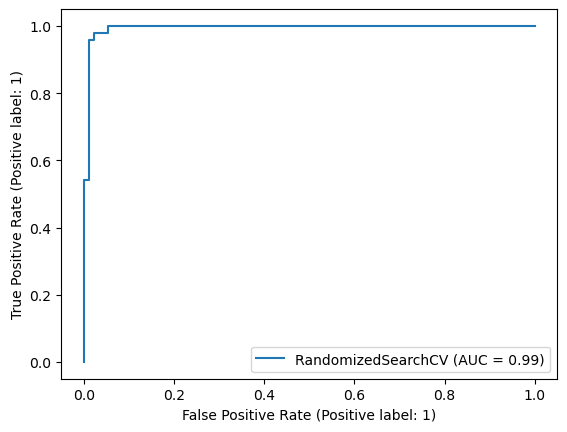

In [42]:
roc_disp=RocCurveDisplay.from_estimator(rs_rf,X_test,y_test)

In [49]:
# Area Under ROC Curve
roc_auc_score(y_test,rs_rf.predict_proba(X_test)[:,1])

0.9938858695652173


### Classification Report


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        92
           1       0.96      0.98      0.97        48

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



**Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.<br>

**Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.<br>

**F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.<br>

**Support** - The number of samples each metric was calculated on.<br>

**Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.<br>

**Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.<br>

**Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).<br>


### Confusion Matrix


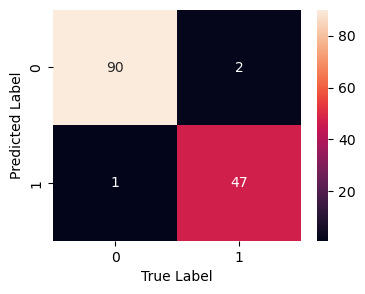

In [59]:
# Plotting Confusion matrix using seaborns heatmap
import seaborn as sns

fig,ax =plt.subplots(figsize=(4,3))
ax=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

plt.xlabel('True Label')
plt.ylabel('Predicted Label');